# Appendix

## Data smoothing

In some cases, you may need a smooth curve rather than a harsh curve. To this end, [Savitzky–Golay filter](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter)(SG filter) may be a reasonable choice. 

### Savitzky–Golay filter

In short, the SG filter replaces each of the data points with the weighted average among its neighbors. The details can be found [here](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter).

The implement of Savitzky–Golay filter here utilizes *scipy*, the scientific computing library.

The [function of Savitzky–Golay](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html) is in the following form:

``` python
scipy.signal.savgol_filter(x, window_length, polyorder, 
                           deriv=0, delta=1.0, axis=-1, mode='interp', cval=0.0)
```
##### parameters
**x : *array_like*** The data to be filtered. If x is not a single or double precision floating point array, it will be converted to type numpy.float64 before filtering.

**window_length : *int*** The length of the filter window (i.e. the number of coefficients). window_length must be a positive odd integer. If mode is ‘interp’, window_length must be less than or equal to the size of x.

**polyorder : *int*** The order of the polynomial used to fit the samples. polyorder must be less than window_length.

**deriv : *int, optional*** The order of the derivative to compute. This must be a nonnegative integer. The default is 0, which means to filter the data without differentiating.

**delta : *float, optional*** The spacing of the samples to which the filter will be applied. This is only used if deriv > 0. Default is 1.0.

**axis : *int, optional*** The axis of the array x along which the filter is to be applied. Default is -1.

**mode : *str, optional*** Must be ‘mirror’, ‘constant’, ‘nearest’, ‘wrap’ or ‘interp’. This determines the type of extension to use for the padded signal to which the filter is applied. When the ‘interp’ mode is selected (the default), no extension is used. Instead, a degree polyorder polynomial is fit to the last window_length values of the edges, and this polynomial is used to evaluate the last window_length // 2 output values.

**cval : *scalar, optional*** Value to fill past the edges of the input if mode is ‘constant’. Default is 0.0.

##### Returns:

**y : *ndarray, same shape as x*** The filtered data.

#### Examples

Here are a few of examples that show the effect of the savgol filter. Feel free to change the parameters.

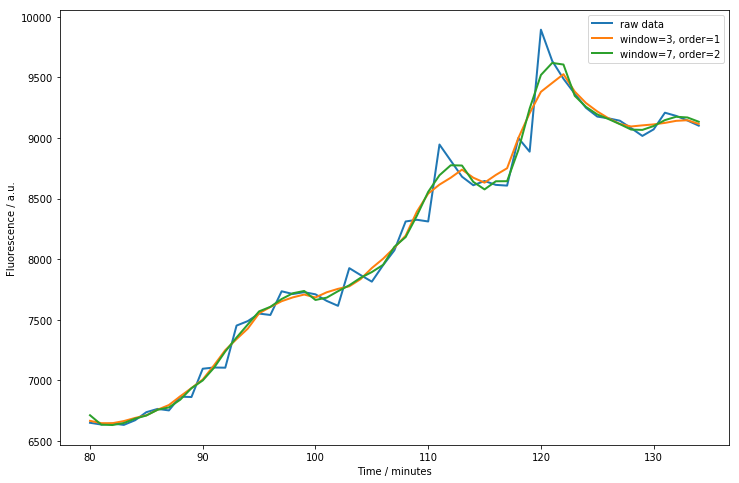

In [1]:
from scipy.signal import savgol_filter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.asarray(pd.read_csv('Data/appendix_1.csv').iloc[:]).reshape(-1)
time = np.linspace(0, data.shape[0]-1, data.shape[0])
sg_31 = savgol_filter(data, 5, 1)
sg_72 = savgol_filter(data, 7, 2)

start = 80
end = -1

plt.figure(figsize=(12, 8))
plt.plot(time[start:end], data[start:end], label='raw data', color='C0', linewidth=2)
plt.plot(time[start:end], sg_31[start:end], label='window=3, order=1', color='C1', linewidth=2)
plt.plot(time[start:end], sg_72[start:end], label='window=7, order=2', color='C2', linewidth=2)

plt.legend()
plt.xlabel('Time / minutes')
plt.ylabel('Fluorescence / a.u.')
plt.show()

## Using Error Bars
#### - Standard error
The knowledge that any individual measurement you make in a lab will lack perfect precision often leads a researcher to choose to take multiple measurements at some independent variable level. Though no one of these measurements are likely to be more precise than any other, this group of values, it is hoped, will cluster about the true value you are trying to measure. This distribution of data values is often represented by showing a single data point, representing the **mean value** of the data, and **error bars** to represent the overall distribution of the data. To get more details, you can refer to [this article](https://projects.ncsu.edu/labwrite/res/gt/gt-stat-home.html#opennewwindow).

Firstly you must get the **mean value** $\mu$ according the following equation:

$$\mu = \frac{1}{N} \sum_{i=1}^{N} x_i$$

[//]: # (where $x_i$ is ??)

There are two common ways you can statistically describe uncertainty in your measurements. One is with the **standard deviation** of a single measurement (often just called the standard deviation) and the other is with the standard deviation of the mean, often called the **standard error**. Since what we are representing the means in our graph, the **standard error** is the appropriate measurement to use to calculate the **error bars**. While we were able to use a function to directly calculate the mean, the standard error calculation is a little more round about. First you have to calculate the **standard deviation** $\sigma$ with following equation:

$$\sigma = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (x_i - \mu)^2}$$

The **standard error** $\sigma_x$ is calculated by dividing the **standard deviation** by the square root of number of measurements that make up the mean (often represented by N):

$$\sigma_x = \frac{1}{\sqrt{N}} \sigma$$

#### - Calculating the standard error in python
The **mean value** can be calculated using *[numpy.mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)*:

``` python
numpy.mean(a, axis=None, dtype=None, out=None, keepdims=<class 'numpy._globals._NoValue'>)
```

##### parameters
**a : *array_like*** Array containing numbers whose mean is desired. If a is not an array, a conversion is attempted.

**axis : *None or int or tuple of ints, optional*** Axis or axes along which the means are computed. The default is to compute the mean of the flattened array.

**keepdims : *bool, optional*** If this is set to True, the axes which are reduced are left in the result as dimensions with size one. With this option, the result will broadcast correctly against the input array.

##### returns
**m : *ndarray*** If out=None, returns a new array containing the mean values, otherwise a reference to the output array is returned.

The **standard deviation** can be calculated using *[numpy.std](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html)*:

``` python
numpy.std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<class 'numpy._globals._NoValue'>)
```

##### parameters
**a : *array_like*** Array containing numbers whose mean is desired. If a is not an array, a conversion is attempted.

**axis : *None or int or tuple of ints, optional*** Axis or axes along which the means are computed. The default is to compute the mean of the flattened array.

**keepdims : *bool, optional*** If this is set to True, the axes which are reduced are left in the result as dimensions with size one. With this option, the result will broadcast correctly against the input array.

##### returns
**standard_deviation : *ndarray*** If out is None, return a new array containing the standard deviation, otherwise return a reference to the output array.

#### - Drawing the error bar
Error bars can be drawn using *[matplotlib.pyplot.errorbar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html)*:

``` python
matplotlib.pyplot.errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, 
                           capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, 
                           xuplims=False, errorevery=1, capthick=None, hold=None, data=None, **kwargs)
```

##### parameters
**x, y : *scalar or array-like*** The data positions.

**xerr, yerr : *scalar or array-like, shape(N,) or shape(2,N), optional*** The errorbar sizes:
- scalar: Symmetric +/- values for all data points.
- shape(N,): Symmetric +/-values for each data point.
- shape(2,N): Separate + and - values for each data point.
- None: No errorbar.

**ecolor : mpl color, optional*** A matplotlib color arg which gives the color the errorbar lines. If None, use the color of the line connecting the markers.

**elinewidth : *scalar, optional*** The linewidth of the errorbar lines. If None, the linewidth of the current style is used.

**capsize : *scalar, optional*** The length of the error bar caps in points. If None, it will take the value from rcParams["errorbar.capsize"].

#### Example
Here is an example that plots the error bars of three sets of data.

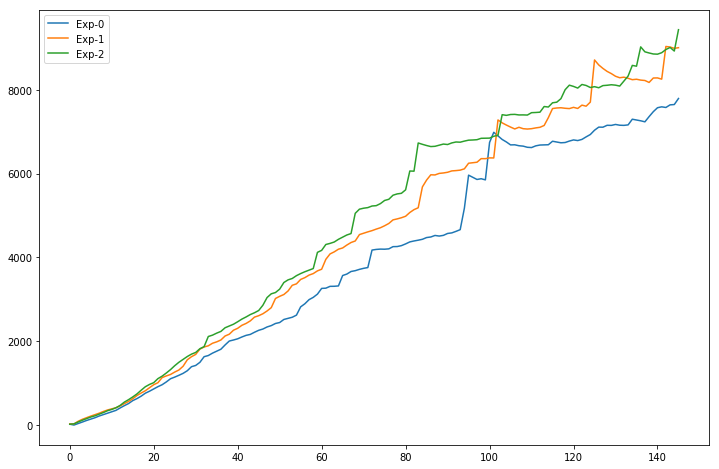

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data/appendix_2.csv')
data = np.asarray(df.iloc[:]).T
x = np.linspace(0, data.shape[1]-1, data.shape[1])

plt.figure(figsize=(12,8))
for i in range(data.shape[0]):
    plt.plot(x, data[i], label='Exp-%d' % i)
plt.legend()
plt.show()

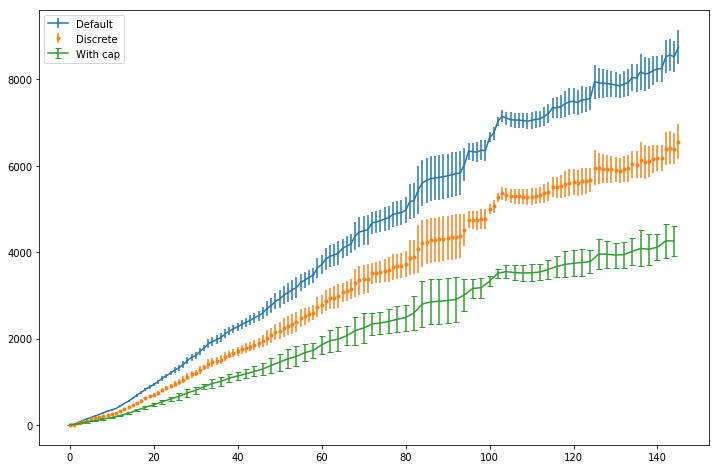

In [24]:
mean = np.mean(data, axis=0)
sd = np.std(data, axis=0)
se = sd / np.sqrt(data.shape[0])

plt.figure(figsize=(12,8))
plt.errorbar(x, mean, yerr=se, label='Default')
plt.errorbar(x, mean*3/4, yerr=se, label='Discrete', fmt='.')
plt.errorbar(x[::2], mean[::2]/2, yerr=se[::2], label='With cap', capsize=3)
plt.legend()
plt.show()